## Unsupervised Learning on Country Data - Analysis

### Import the necessary libraries

In [1]:
# necessary libraries
import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle
from pathlib import Path
from pandas_profiling import ProfileReport

### Load and preprosess the data

In [5]:
file_path = str(Path().parent.absolute().parent.absolute()) + '\\01. Data\\Cleaned_Data.csv'
df_original = pd.read_csv(file_path)

In [6]:
df_original = df_original.drop('Unnamed: 0', axis=1)
df_original

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
countries = df_original['country']
countries

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [8]:
df = df_original.drop('country',axis=1)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Data Analysis

#### Κατανομές

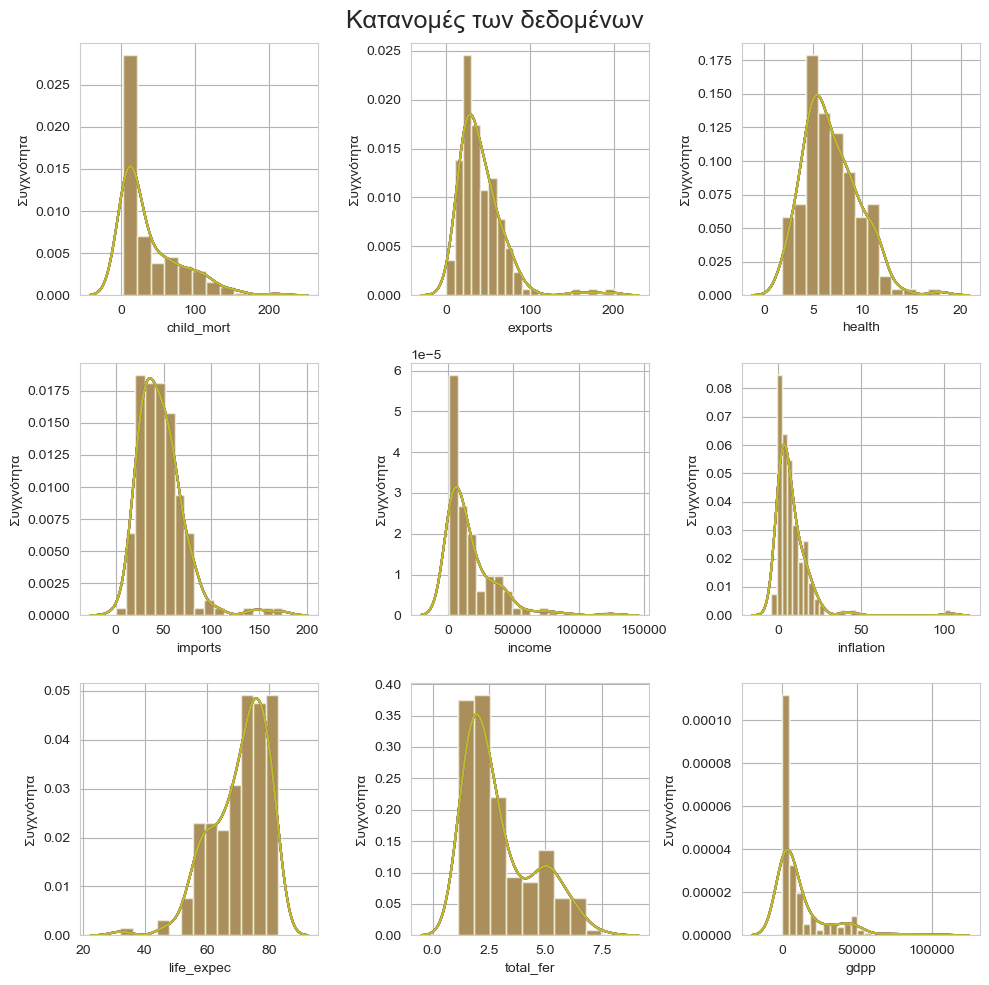

In [12]:
plot_x_axis = 3
plot_y_axis = 3

fig, axes = plt.subplots(plot_x_axis, plot_y_axis, figsize=(10, 10))
fig.suptitle('Κατανομές των δεδομένων',fontsize=14
            )
sns.set_style('whitegrid',{"grid.color": "0.7"})

for column in df.columns:
    for i in range(plot_x_axis):
        for j in range(plot_y_axis):
            plt.subplot(plot_x_axis,plot_y_axis,df.columns.get_loc(column)+1)
            sns.distplot(df[column])
            plt.xlabel(column)
            plt.ylabel('Συγχνότητα')
plt.tight_layout()
#plt.savefig('distributions.jpg', format='jpeg', dpi=300, bbox_inches = 'tight')
plt.show()

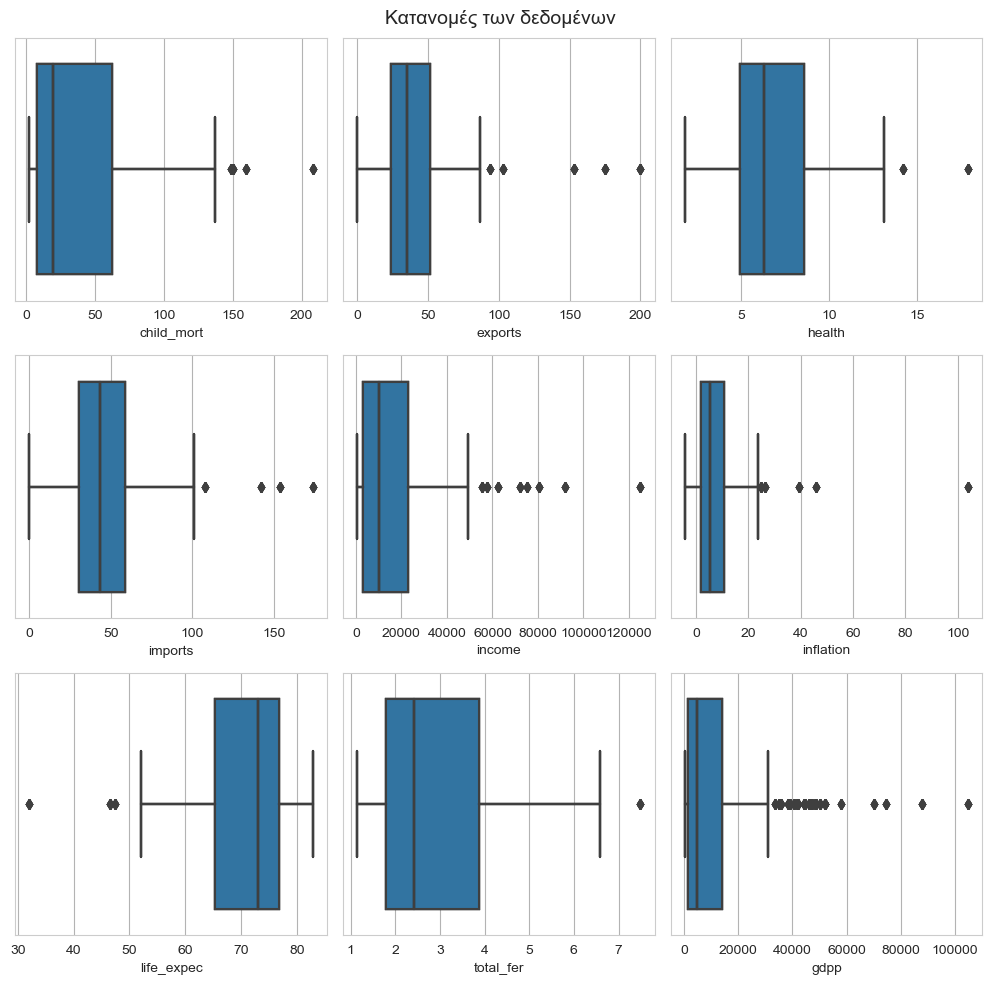

In [17]:
plot_x_axis = 3
plot_y_axis = 3

fig, axes = plt.subplots(plot_x_axis, plot_y_axis, figsize=(10, 10))
fig.suptitle('Κατανομές των δεδομένων',fontsize=14)
sns.set_style('whitegrid',{"grid.color": "0.7"})

for column in df.columns:
    if (column != "Ημ/νία"):
        for i in range(plot_x_axis):
            for j in range(plot_y_axis):
                plt.subplot(plot_x_axis,plot_y_axis,df.columns.get_loc(column)+1)
                sns.boxplot(x=df[column])
                plt.xlabel(column)
                #plt.ylabel('Συγχνότητα')
plt.tight_layout()
#plt.savefig('distributions2.jpg', format='jpeg', dpi=300, bbox_inches = 'tight')
plt.show()

#### Correlations

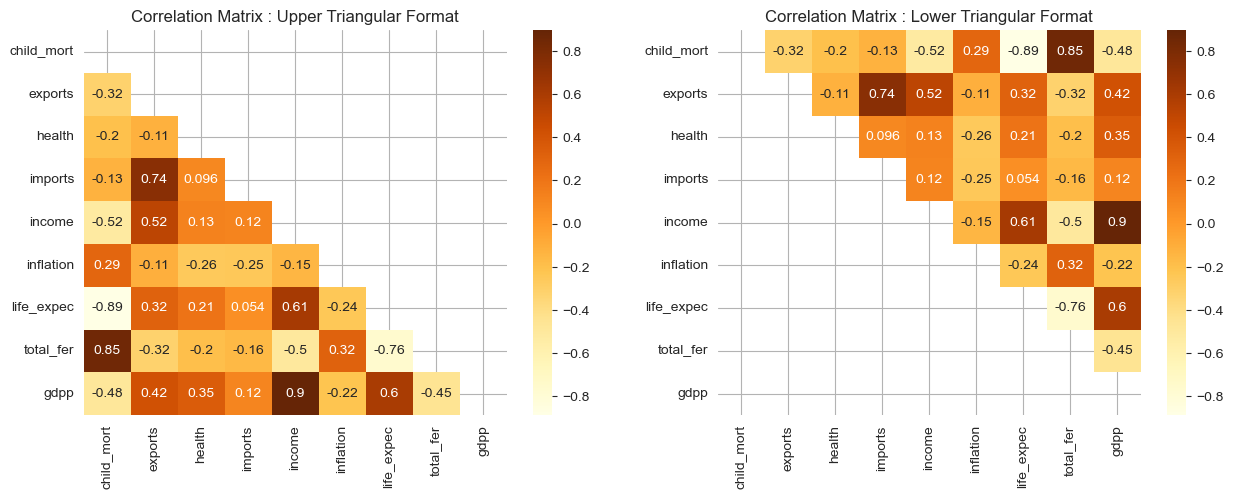

In [16]:
ut = np.triu(df.corr())
lt = np.tril(df.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df.corr(),cmap = 'YlOrBr',annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(df.corr(),cmap = 'YlOrBr',annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

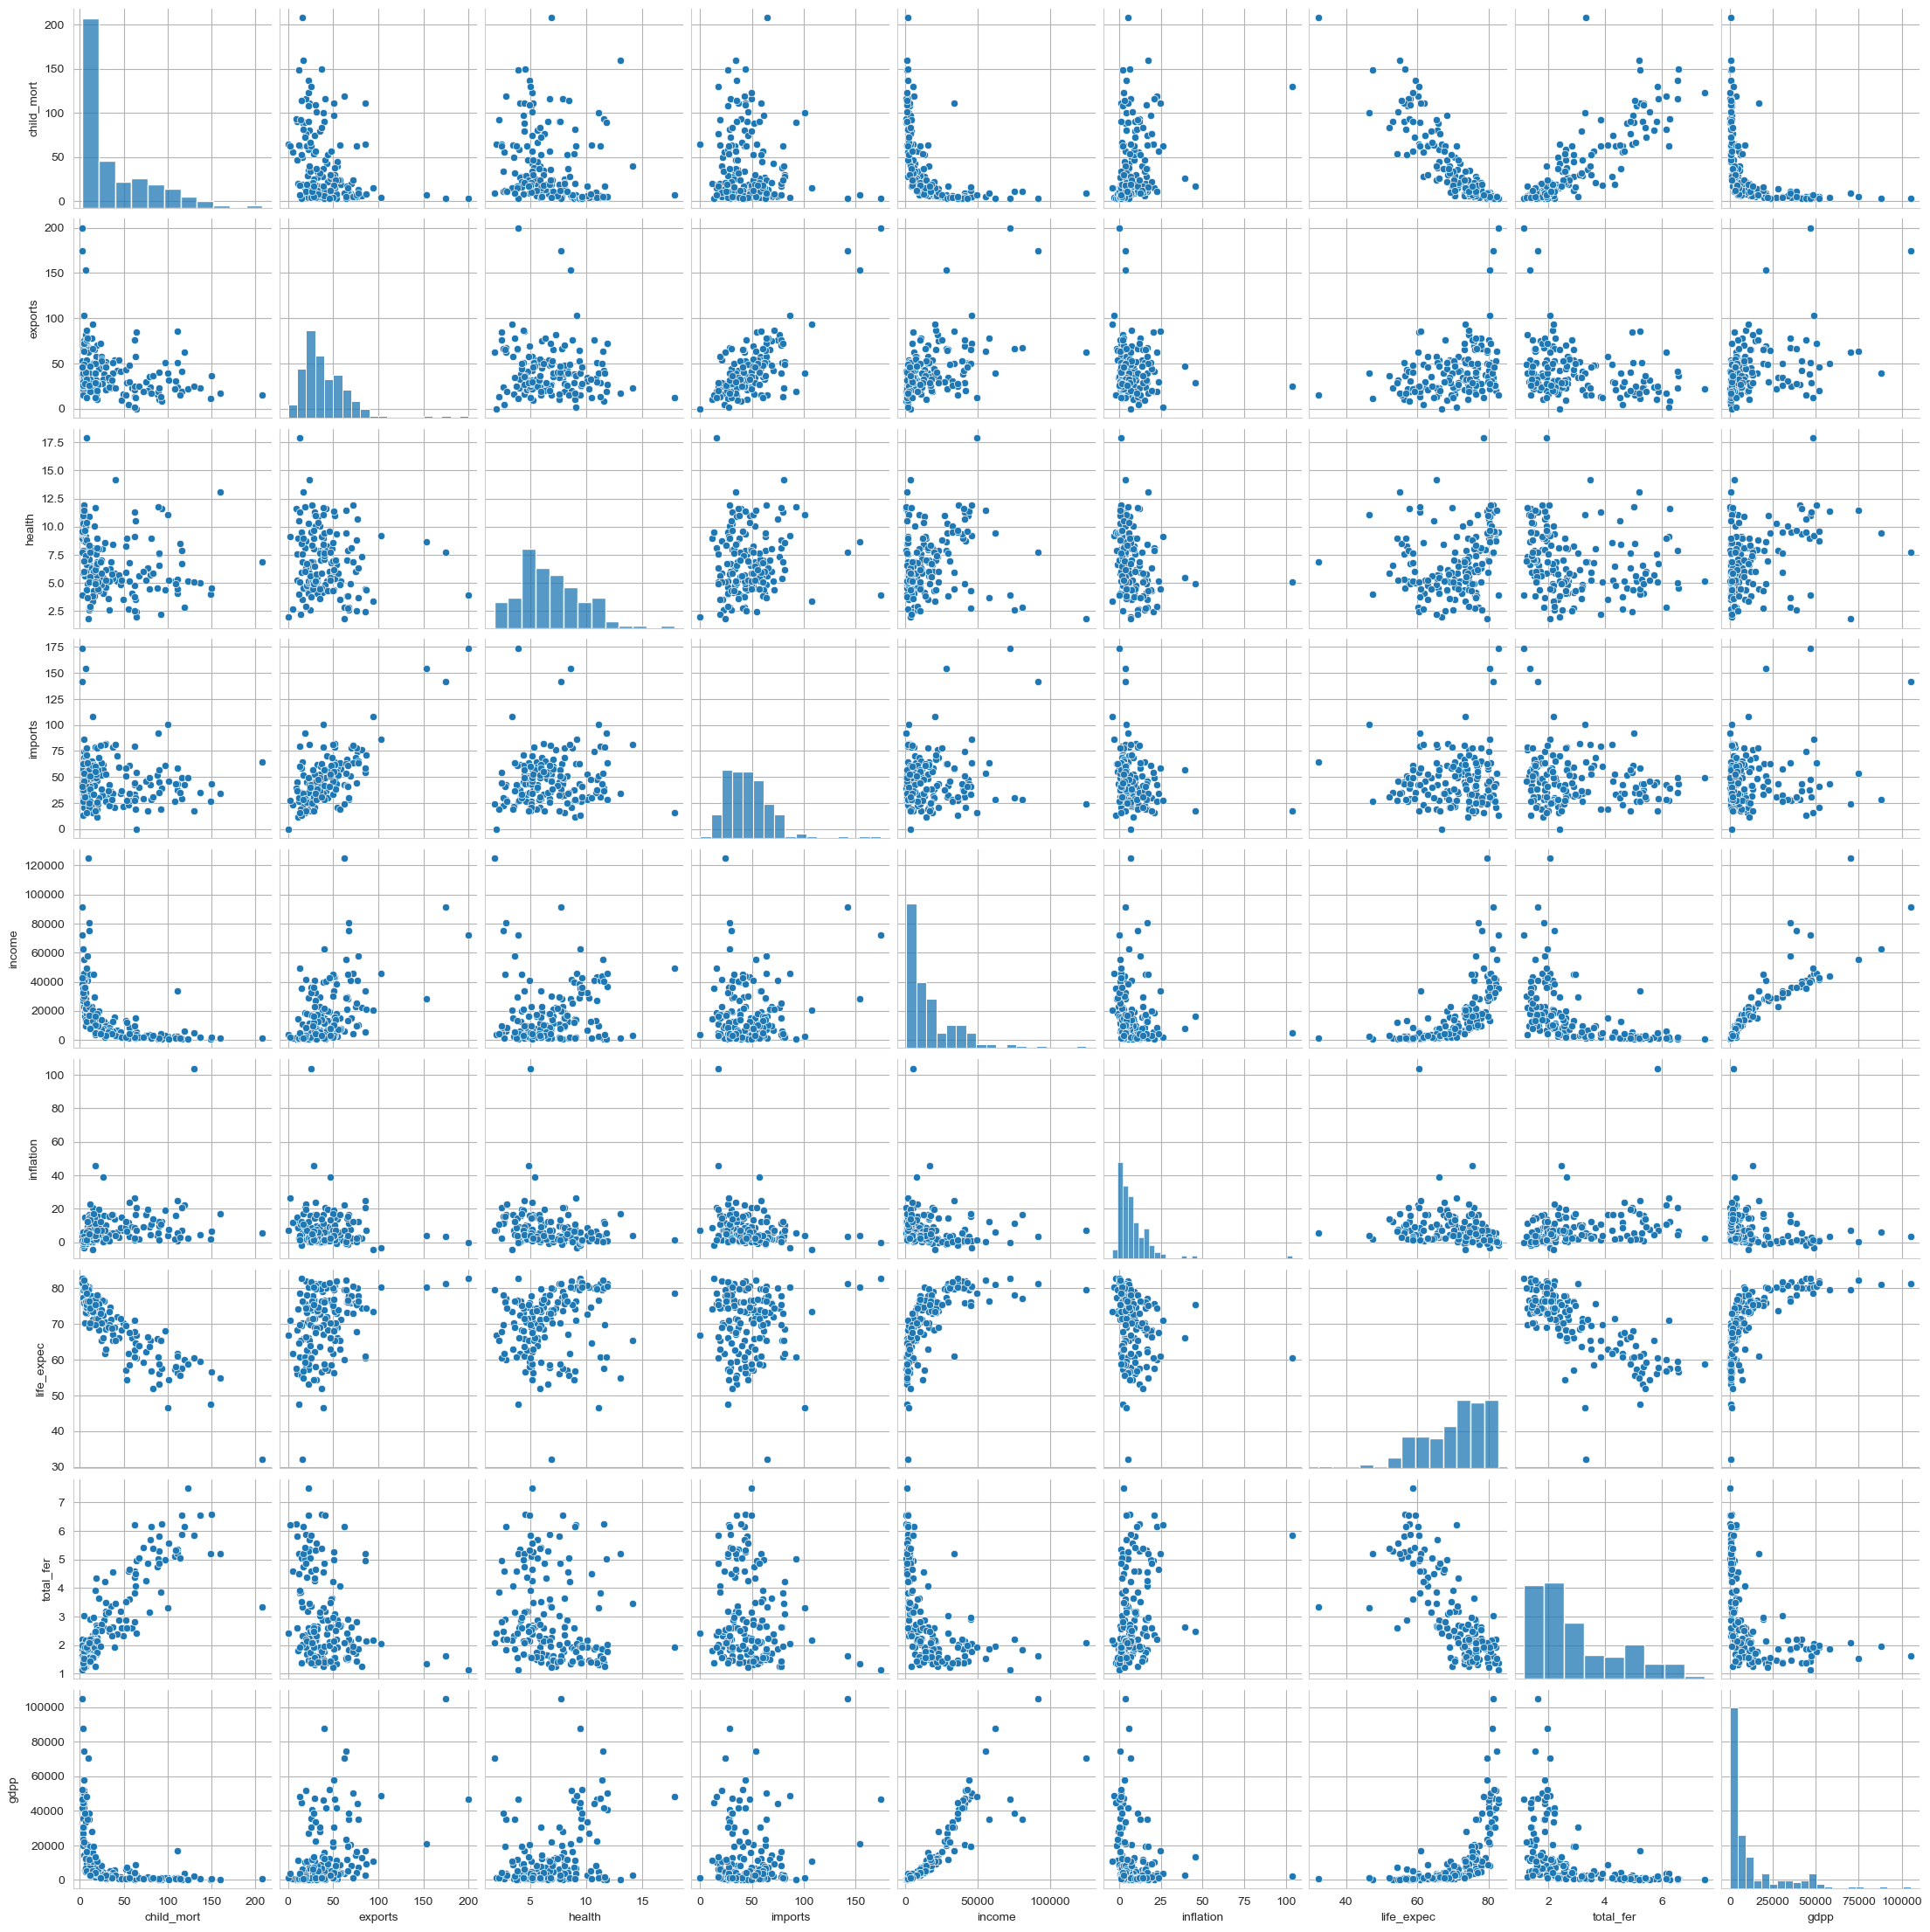

In [18]:
sns.pairplot(df)

#### Country vs Numerical Features

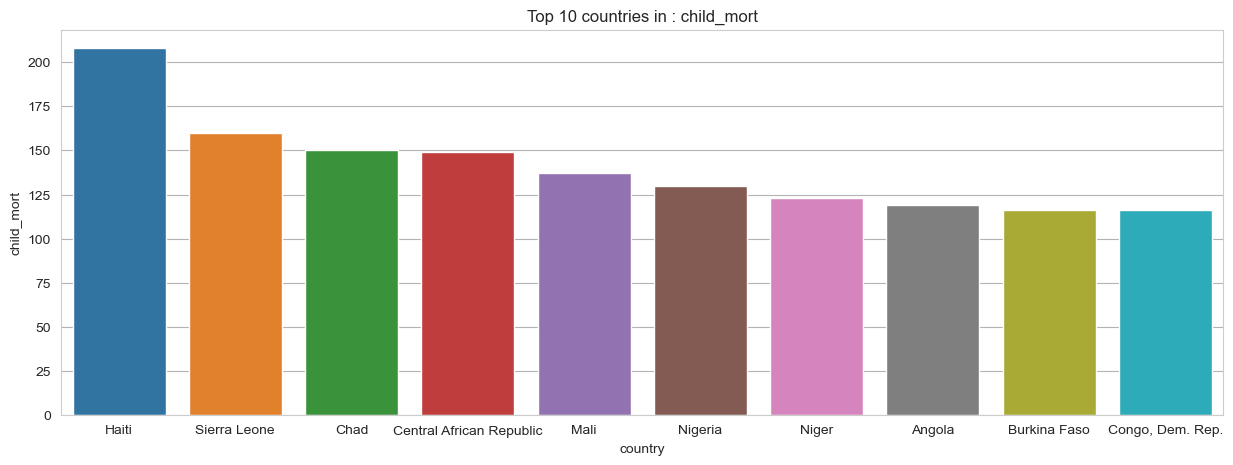

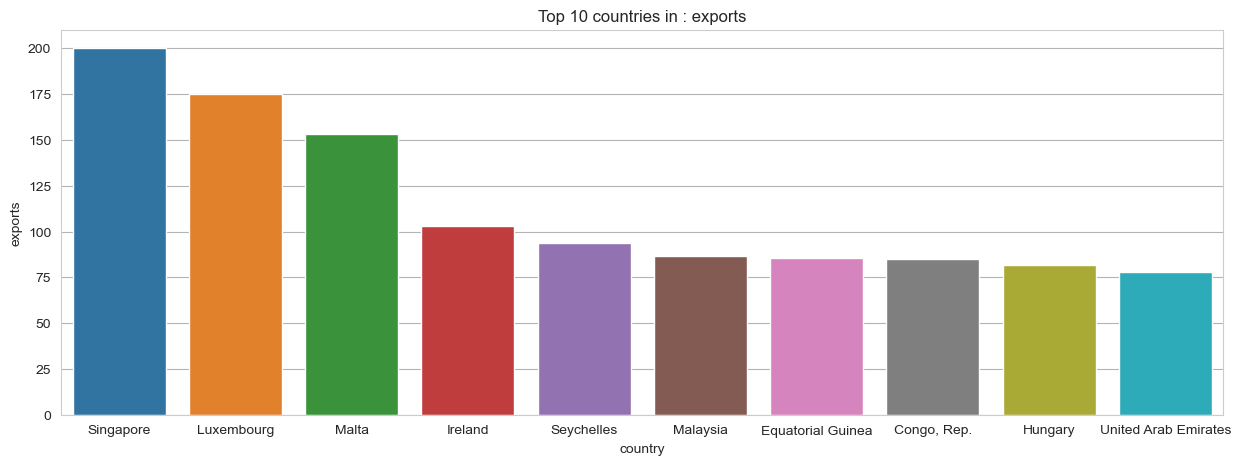

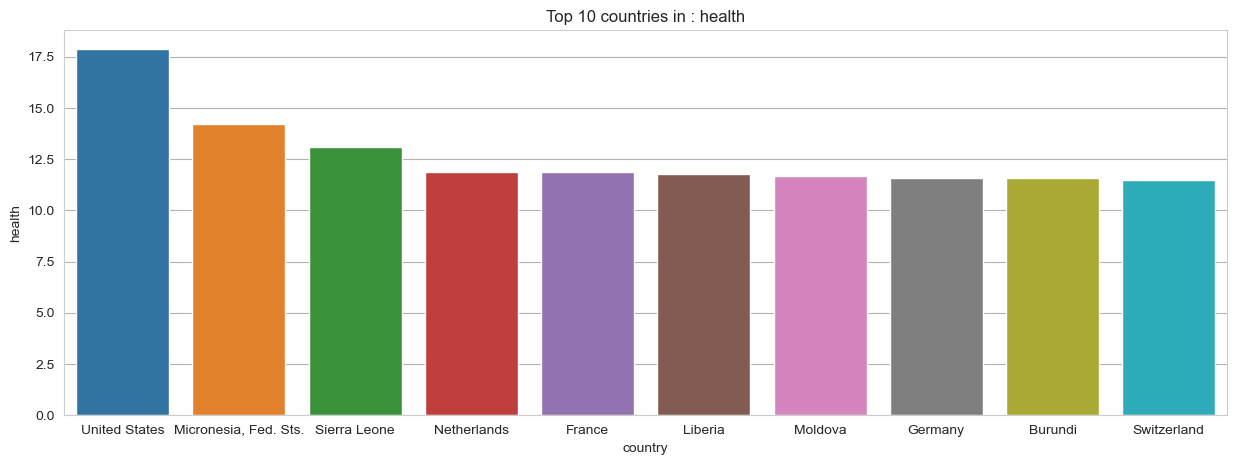

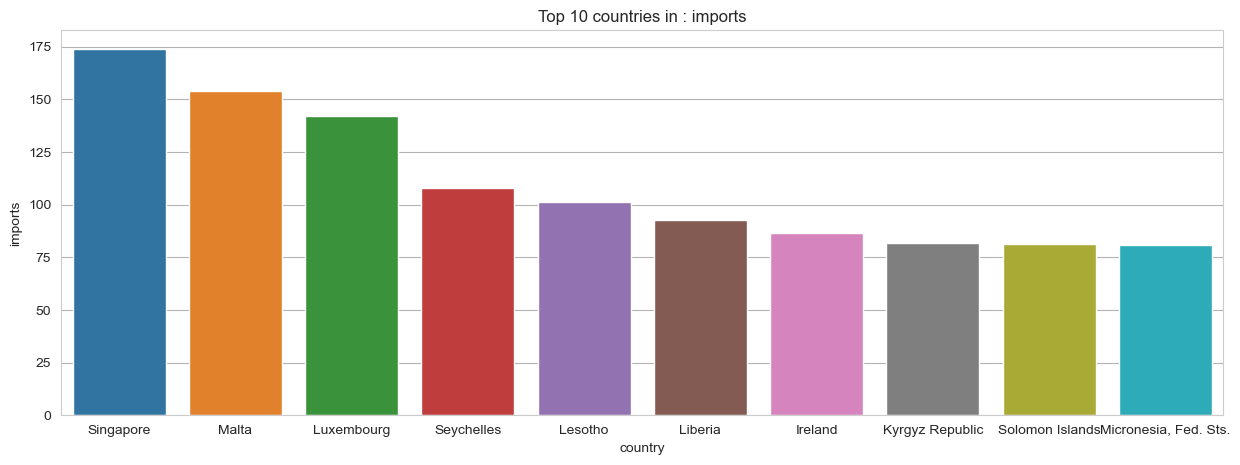

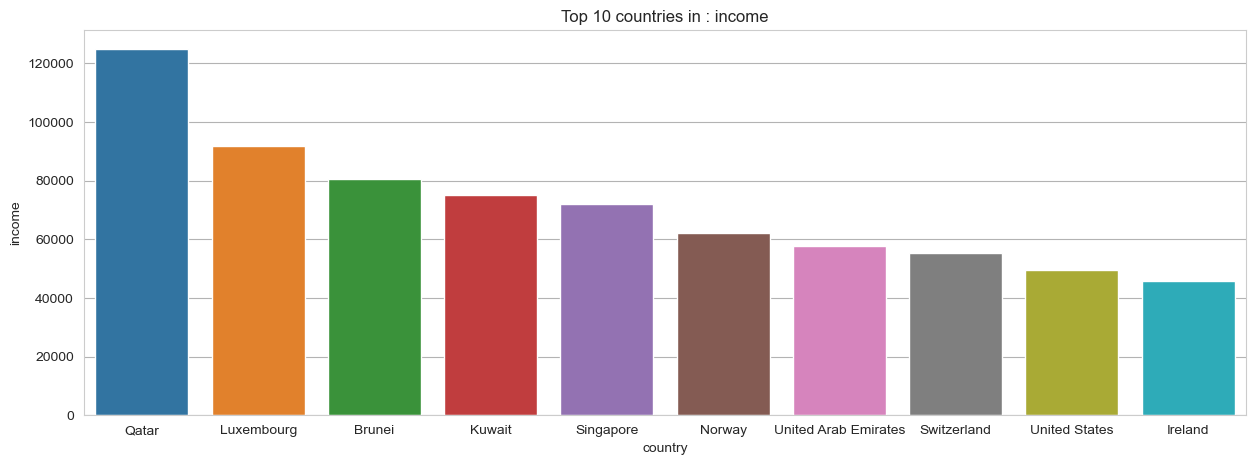

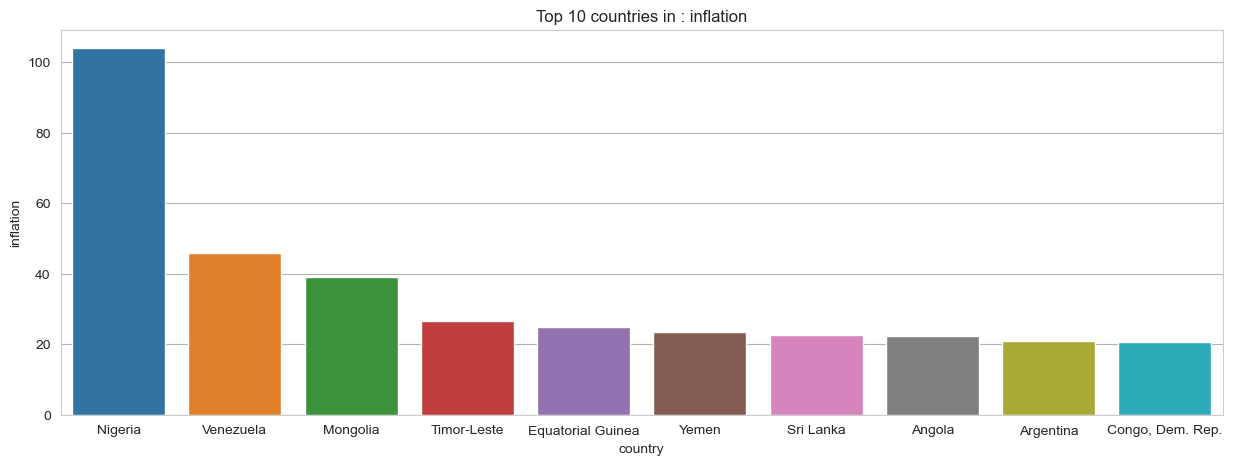

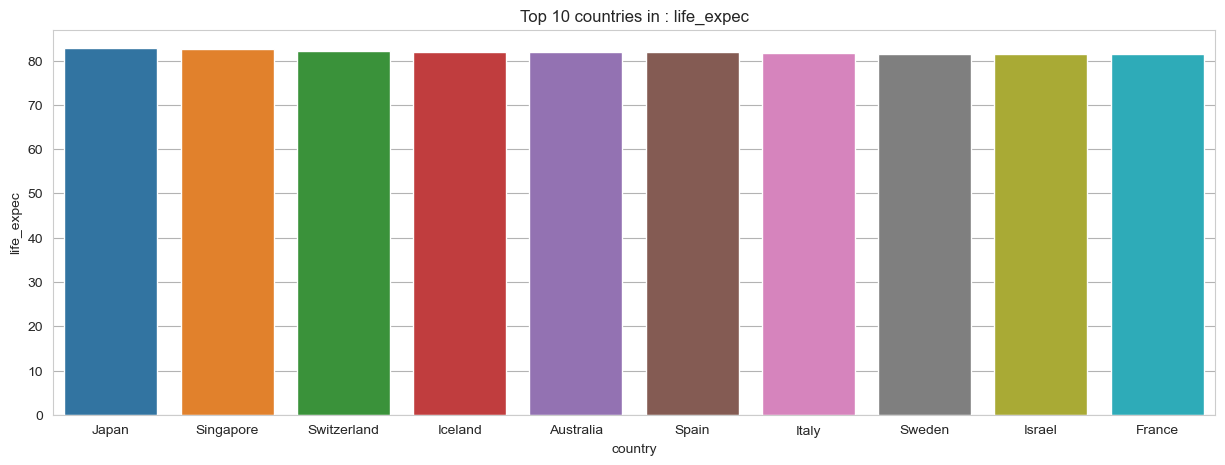

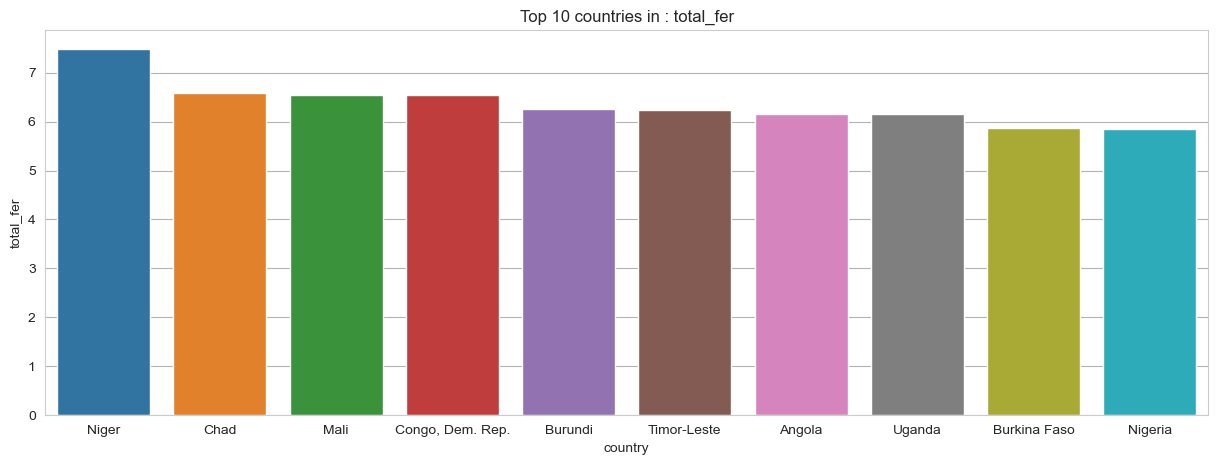

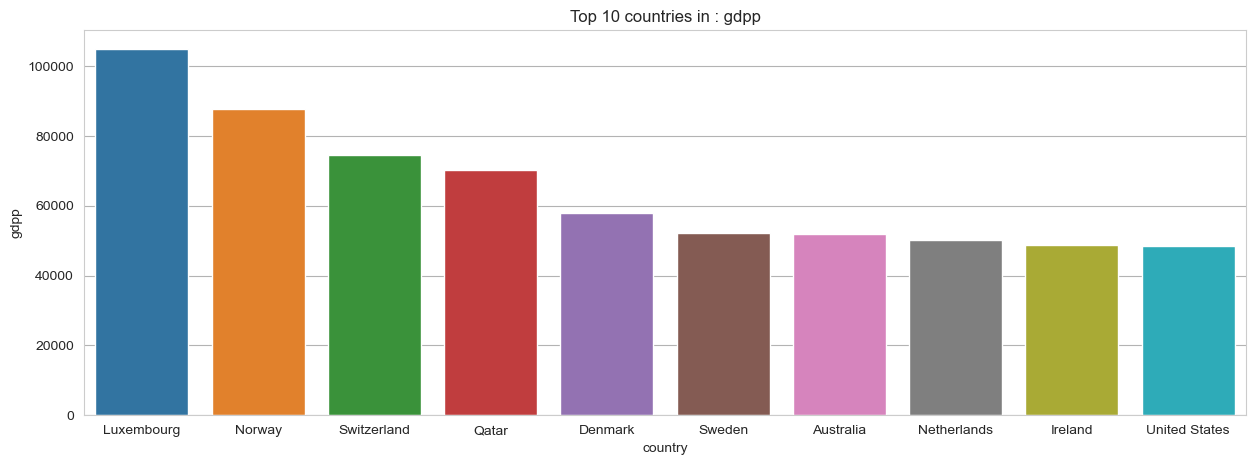

In [31]:
top_10 = pd.DataFrame()
for column in df.columns:
    top_10 = df_original.sort_values(column,ascending=False)[['country',column]].head(10)
    plt.figure(figsize = (15,5))
    plt.title('Top 10 countries in : '+ column)
    sns.barplot(data=top_10, x="country", y=column);

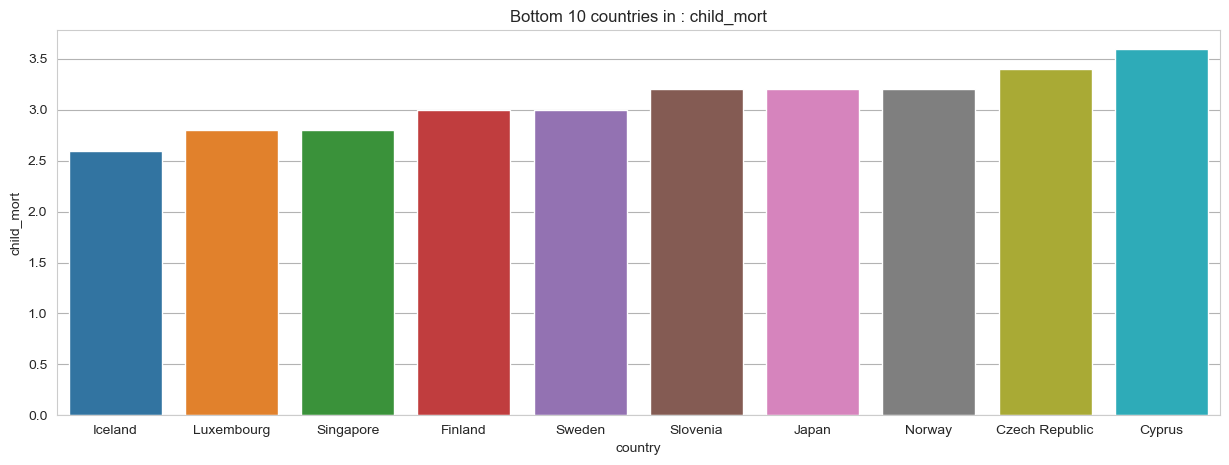

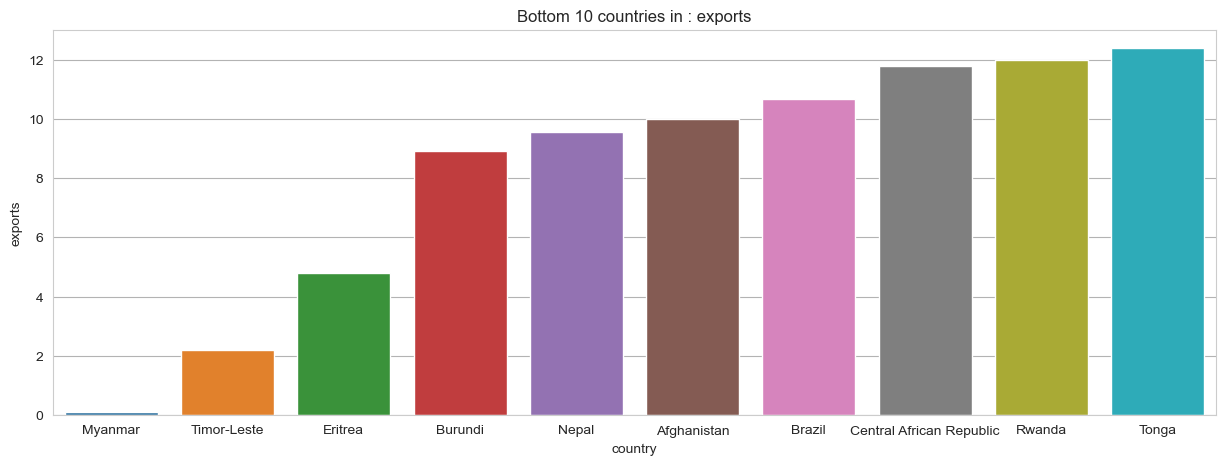

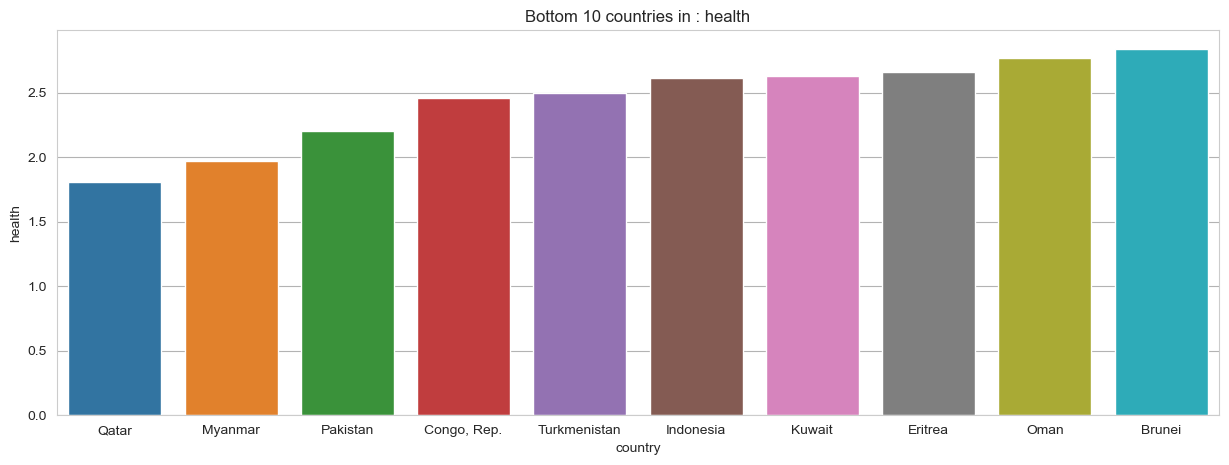

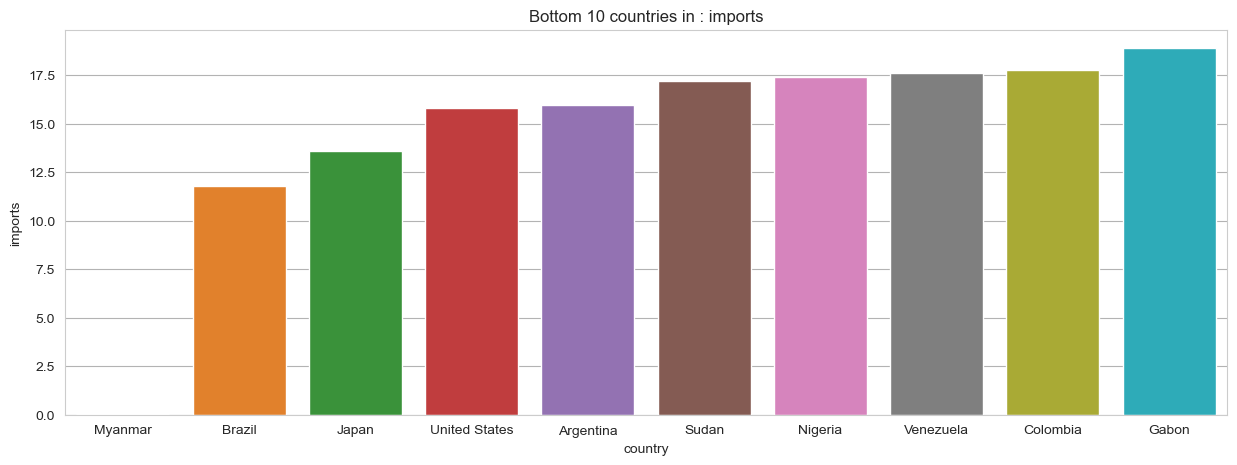

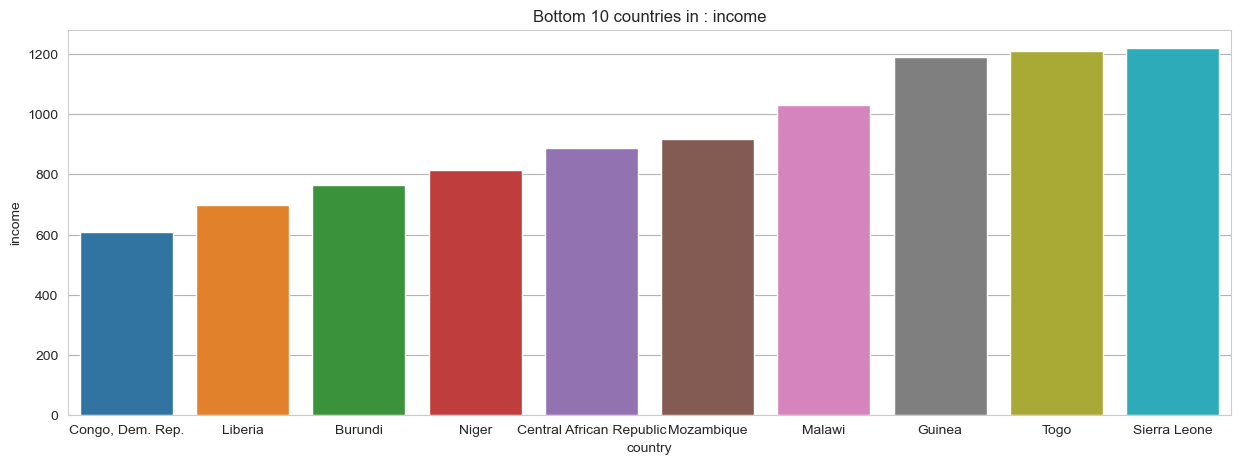

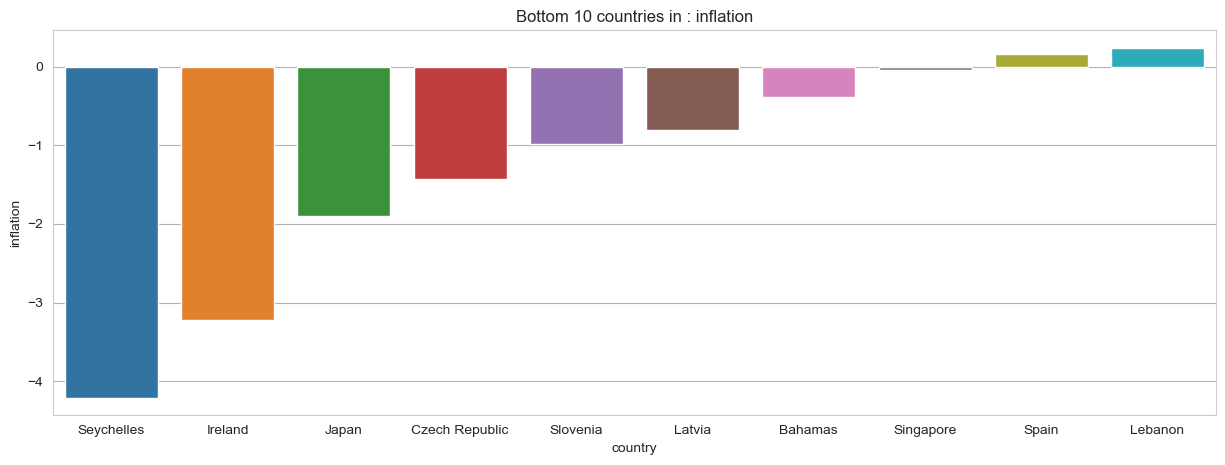

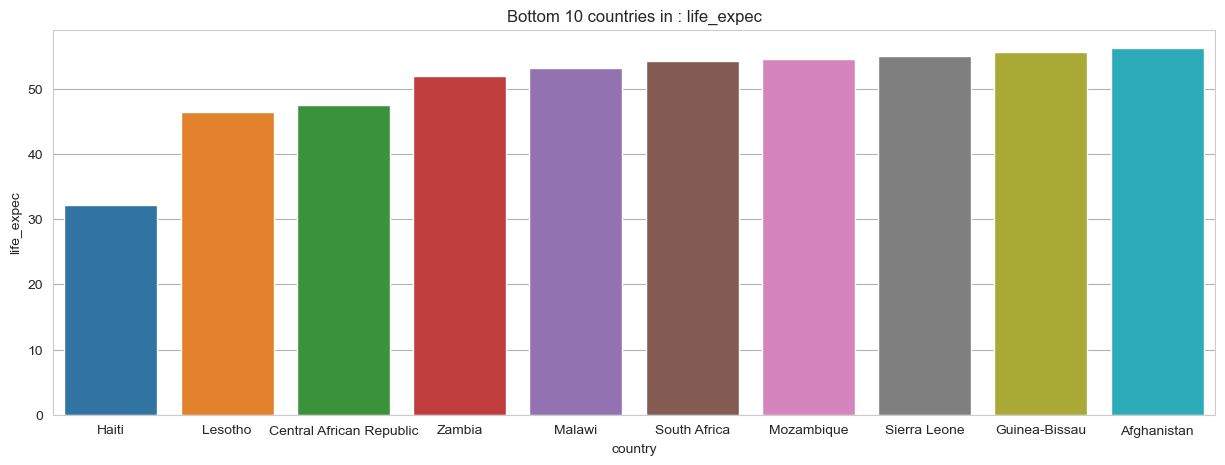

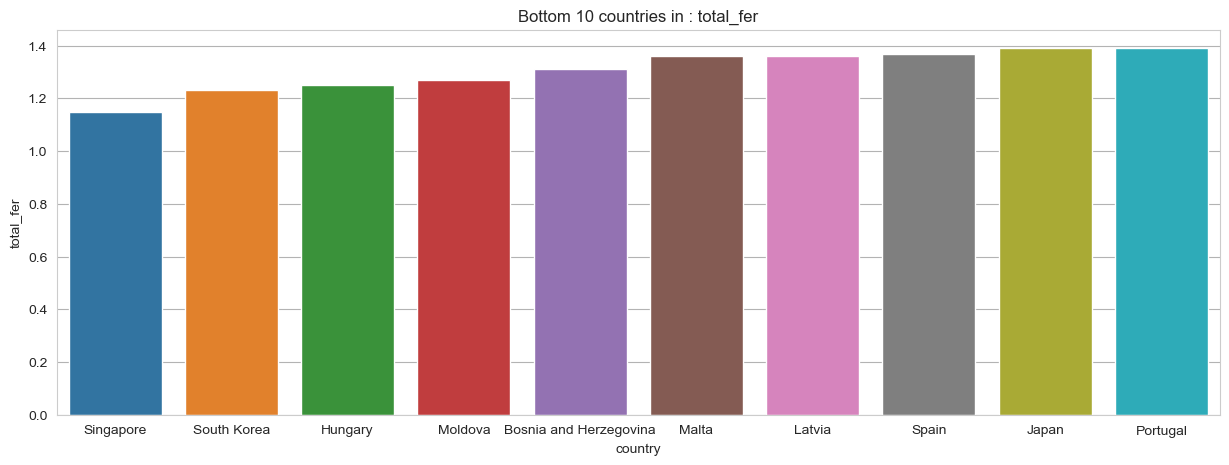

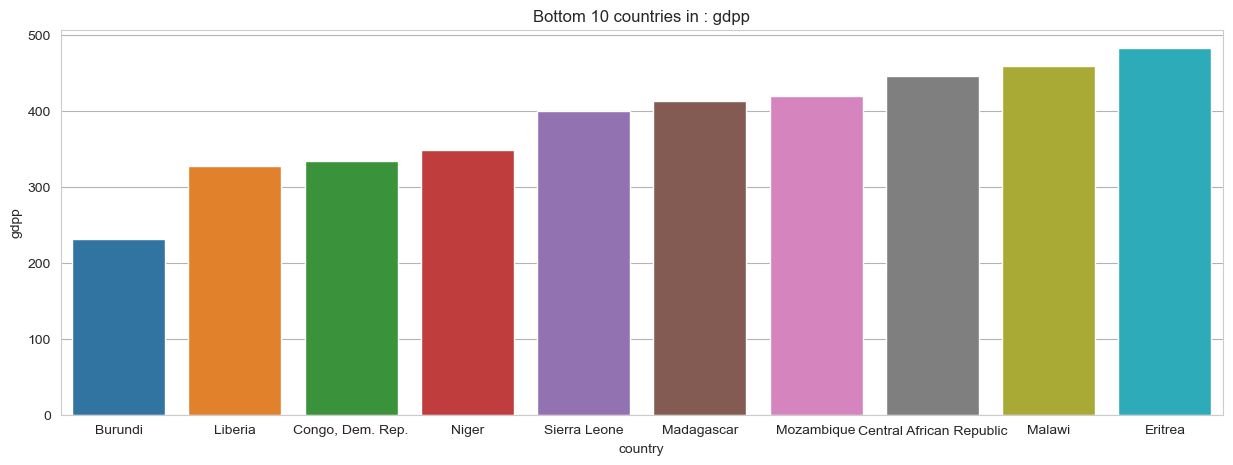

In [30]:
bot_10 = pd.DataFrame()
for column in df.columns:
    bot_10 = df_original.sort_values(column,ascending=True)[['country',column]].head(10)
    plt.figure(figsize = (15,5))
    plt.title('Bottom 10 countries in : '+ column)
    sns.barplot(data=bot_10, x="country", y=column);